In [55]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('parken_dump.csv', encoding='latin1')

In [57]:
data['Belegung'] = 100.0-data['free']/data['count']*100.0

In [58]:
ppDD = data.pivot(index='time', columns='name', values='Belegung')

# Define index and names
ppDD.index = pd.DatetimeIndex(ppDD.index)
ppDD.index.name = 'Zeit'
ppDD.columns.name = 'Parkplatz'

print('Daten von %s/%s bis %s/%s' % (ppDD.index[0].month, ppDD.index[0].year, ppDD.index[-1].month, ppDD.index[-1].year)) 

Daten von 4/2014 bis 5/2015


In [59]:
# Wir nehmen nur ein gesamtes Jahr
ppDD = ppDD['2015-02-02':'2015-03-01']

In [60]:
# format the percent without digits
ppDD = ppDD.applymap(lambda x: float('%.0f' % x))

# and limit it between 0...100%
ppDD = ppDD.applymap(lambda x: min(max(x, 0.0), 100.0))

In [61]:
for p in ppDD.columns:
    print p

Altmarkt
Altmarkt - Galerie
An der Frauenkirche
Bühlau
Centrum-Galerie
City  Center
Cossebaude
Ferdinandplatz
Flutrinne
Frauenkirche Neumarkt
Hauptstraße
Haus am Zwinger
Kaditz
Karstadt
Kongresszentrum
Langebrück
Lindengasse
Parkhaus Mitte
Pennrich
Pirnaischer Platz
Prohlis
Reitbahnstraße
Sarrasanistraße
Schießgasse
Semperoper
Taschenbergpalais
Terrassenufer
Terrassenufer Bus
Theresienstraße
Wiener Platz/Hbf.
Wiesentorstraße
World Trade Center
Wöhrl - Florentinum


In [62]:
parkplatz = 'Centrum-Galerie'
parkplatzdf = ppDD[[parkplatz]].dropna()

In [63]:
hann = np.hanning(len(parkplatzdf.values))

In [64]:
parkplatzdf.values.ravel()

array([ 12.,  12.,  12., ...,  12.,  12.,  13.])

In [65]:
Y = np.fft.fft(hann*parkplatzdf.values.ravel())

In [66]:
N = len(Y)/2+1
fa = 1.0/(15.0*60.0) # every 15 minutes

In [67]:
X = np.linspace(0, fa/2, N, endpoint=True)

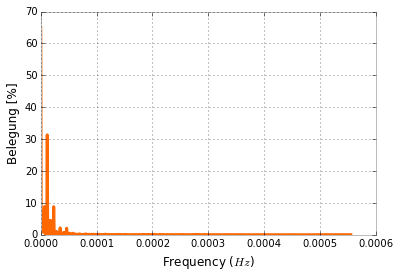

In [68]:
plt.plot(X, 2.0*np.abs(Y[:N])/N)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Belegung [%]')

In [69]:
Xp = 1.0/X # in seconds
Xph= Xp/(60.0*60.0) # in hours

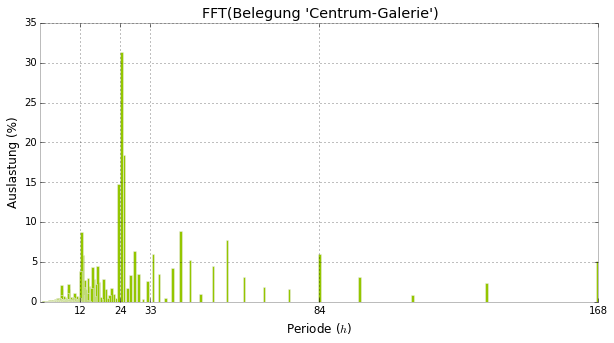

In [70]:
plt.figure(figsize=(10,5))
plt.bar(Xph, 2.0*np.abs(Y[:N])/N)
plt.xticks([12, 24, 33, 84, 168])
plt.xlim(0, 168)
#plt.ylim(0, 1500)
plt.xlabel('Periode ($h$)')
plt.ylabel('Auslastung (%)')
plt.title('FFT(Belegung \'%s\')' % parkplatz)
plt.savefig('FFT-Periode-%s.png' % parkplatz.strip(),bbox_inches='tight', dpi=72)

* 12h day/night rythm
* 24h daily rythm
* 33.6h something? Any suggestions?
* 84.2h something? Any suggestions?
* 168h week rythm

In [385]:
Yr = Y
#Yr[N-2:N].real=0.0

In [386]:
forecast = np.fft.ifft(Yr)

(0, 100)

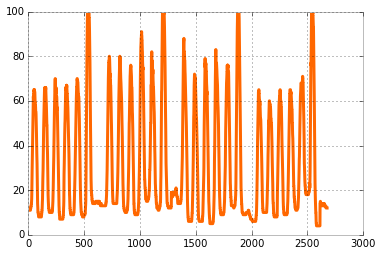

In [387]:
plt.plot(np.abs(forecast)/hann)
plt.ylim(0,100)